# Plotting MCWD and MAP composite values map

To plot the composite map we have created in Duque et al. (2019) using the maximum climatological water deficit (MCWD) and the mean annual precipitation (MAP) we have a specific function in obrero. Let's import obrero and the experimental mcwd module:

In [1]:
# small hack to be able to import module without install
import os
import sys
sys.path.append(os.getcwd() + '/../')

import obrero
from obrero.experimental import mcwd

Now we read data from two experiment simulations:

In [6]:
# file name
f1 = 'data/ctl_pr_evap.nc'
f2 = 'data/pen_pr_evap.nc'
f3 = 'data/ctl_evapmean.nc'

# read as data array (ignore warnings because netCDF files are weird)
da1 = obrero.read_nc(f1, 'pr')
da2 = obrero.read_nc(f2, 'pr')
ev = obrero.read_nc(f3, 'evap')

And we repeat all steps we have done in previous examples to get the composite map:

In [3]:
# sum monthly values to get yearly
map1 = da1.groupby('time.year').sum(dim='time', keep_attrs=True)
map2 = da2.groupby('time.year').sum(dim='time', keep_attrs=True)

# rename time
map1 = map1.rename({'year': 'time'})
map2 = map2.rename({'year': 'time'})

# compute mcwd
wd1 = mcwd.get_mcwd(da1, ev)
wd2 = mcwd.get_mcwd(da2, ev)

# composite
composite, table = mcwd.mcwd_composite_map(wd2, map2, wd1, map1)

And to plot it we simply use the function `plot_mcwd_composite()` function inside of the experimental module `òbrero.experimental.mcwd`:

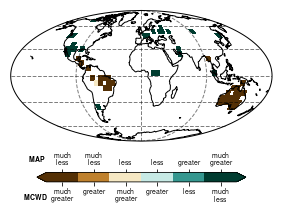

In [7]:
%matplotlib inline
ax = mcwd.plot_mcwd_composite(composite, 100, 80)

Colors are explained in the colorbar as well as in Duque et al. (2019).

## References

Duque et al. (2019)